# Data visualisation on the SSDD dataset

In [27]:
from typing import List
from pathlib import Path

from torchvision.transforms import ToTensor
from torchvision.datasets import CocoDetection
import torch

import numpy as np
from matplotlib import pyplot as plt, patches

## Some helper function

In [28]:
def convert_bbox_from_COCO_to_pytorch(bbox: List) -> List:
    """
    Convert COCO bbox format to a pytorch format
    In coco format, bbox = [x_min, y_min, width, height]
    In pytorch, the input should be [x_min, y_min, x_max, y_max]

    :param bbox: box in the COCO format
    :return: (x_min, y_min, x_max, y_max)
    """
    return [bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]]


def convert_bbox_from_pytorch_to_COCO(bbox: List) -> List:
    """
    Convert pytorch bbox format to a COCO format
    In coco format, bbox = [x_min, y_min, width, height]
    In pytorch, the input should be [x_min, y_min, x_max, y_max]

    :param bbox: box in the pytorch format
    :return: (x_min, y_min, width, height)
    """
    return [bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]]


def convertAnnFile(ann):
    """
    Convert annotation file from COCO format to PyTorch

    :param ann:
    :return:
    """
    for el in ann:
        el['bbox'] = convert_bbox_from_COCO_to_pytorch(el['bbox'])
    return ann

## Show image with bbox

In [29]:
def show_bbox_on_images(image: np.ndarray, bboxes: List[np.ndarray], title='Ground true'):
    fig, ax = plt.subplots()        # Create figure and axes
    plt.title(title)
    plt.axis('off')
    ax.imshow(1 - image)    # Display the image
    for bbox in bboxes:
        # Create rectangle
        top_left_corner = np.array([int(bbox[0]), int(bbox[1])])
        width, height = int(bbox[2]), int(bbox[3])
        rect = patches.Rectangle(top_left_corner, width, height, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.show()

In [30]:
data_root = Path('../data/SSDD/')            # root dir of the dataset

# Loading training data
training_data = CocoDetection(root=data_root / Path('images/train'),
                              annFile=data_root / Path('annotations/train.json'),
                              transform=ToTensor())


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


[{'area': 358.143196717589, 'iscrowd': 0, 'image_id': 27, 'bbox': [169.0856031128405, 211.68482490272376, 15.564202334630352, 42.41245136186771], 'category_id': 0, 'id': 29, 'ignore': 0, 'segmentation': [[172.58754863813232, 211.68482490272376, 178.42412451361872, 217.13229571984436, 184.64980544747084, 243.98054474708175, 183.8715953307393, 252.15175097276267, 179.2023346303502, 254.09727626459147, 175.70038910505838, 245.147859922179, 170.64202334630352, 229.1945525291829, 169.0856031128405, 217.52140077821014]]}]


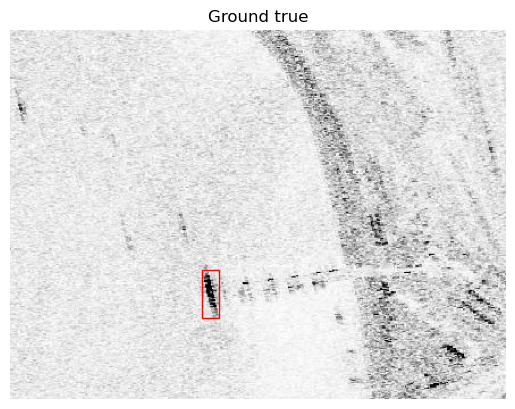

In [31]:
img, label = training_data[np.random.randint(0, len(training_data))]
img = img.permute([1, 2, 0])        # fit to the matplotlib format
img = img.numpy()

bboxes = [el['bbox'] for el in label]
print(label)
show_bbox_on_images(img, bboxes)

In [32]:
for k, (img, label) in enumerate(training_data):
    img = img.permute([1, 2, 0])
    img = img.numpy()

    bboxes = [el['bbox'] for el in label]

    print(f"Number of ship : {len(bboxes)}")

Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 3
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 3
Number of ship : 2
Number of ship : 2
Number of ship : 2
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 2
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 2
Number of ship : 1
Number of ship : 1
Number of ship : 2
Number of ship : 2
Number of ship : 1
Number of ship : 3
Number of ship : 1
Number of ship : 2
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 2
Number of ship : 2
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 2
Number of sh

## Looking for the mean and the std of the dataset

In [33]:
def compute_mean_std(image, axis=(0, 1)):
    return np.mean(image, axis=axis), np.std(image, axis=axis)

In [34]:
# print((img[:, :, 0] == img[:, :, 1]).all())
# print((img[:, :, 0] == img[:, :, 2]).all())

psum, psum_sq = torch.tensor([0.]), torch.tensor([0.])
count = 0
shape = []
for k, (img, label) in enumerate(training_data):
    count += img.shape[1] * img.shape[2]
    psum += img[0, :, :].sum(axis=[0, 1])
    psum_sq += (img[0, :, :]**2).sum(axis=[0, 1])
    shape.append(img.shape)

mean = psum / count
var = (psum_sq / count) - (mean**2)
std = torch.sqrt(var)

print(mean, std)

tensor([0.1612]) tensor([0.1696])
